# Работа с графами в NetworkX

__Авторы задач: Макрушин С.В (SVMakrushin@fa.ru), Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 1: Введение в сетевой анализ и знакомство с библиотекой NetworkX"
* Документация:
    * https://networkx.org/documentation/stable/tutorial.html#creating-a-graph
    * https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_node_attributes.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_edge_attributes.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html
    * https://networkx.org/documentation/stable/reference/classes/index.html
    * https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html
    * https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.remove_edges_from.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.selfloop_edges.html
    * https://networkx.org/documentation/stable/reference/readwrite/index.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_numpy_array.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.social.karate_club_graph.html
    * https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.edgelist.read_edgelist.html
    * https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.json_graph.node_link_data.html
    * https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.graphml.write_graphml.html
* Датасеты с сетями:
    * http://networkrepository.com
    * http://konect.cc/networks/
    * https://snap.stanford.edu/data/
    * https://networkdata.ics.uci.edu/resources.php
    * https://kateto.net/2016/05/network-datasets/

## Вопросы для совместного обсуждения

1\. Обсудите основные возможности по созданию графов и работы с графами в NetworkX

In [1]:
import networkx as nx

In [2]:
G = nx.Graph()
G.add_node(10)
G.add_node("Anna")
G.add_node((1, 2))
G.add_node("10", name="Nikita", age=18)

In [3]:
list(G.nodes(data=True))

[(10, {}), ('Anna', {}), ((1, 2), {}), ('10', {'name': 'Nikita', 'age': 18})]

In [4]:
G.add_edge(10, "Anna", weight=100, tensors=None)

In [5]:
G.edges

EdgeView([(10, 'Anna')])

In [6]:
for n in G:
  print(n)

10
Anna
(1, 2)
10


In [7]:
G[10]

AtlasView({'Anna': {'weight': 100, 'tensors': None}})

In [8]:
G["Anna"]

AtlasView({10: {'weight': 100, 'tensors': None}})

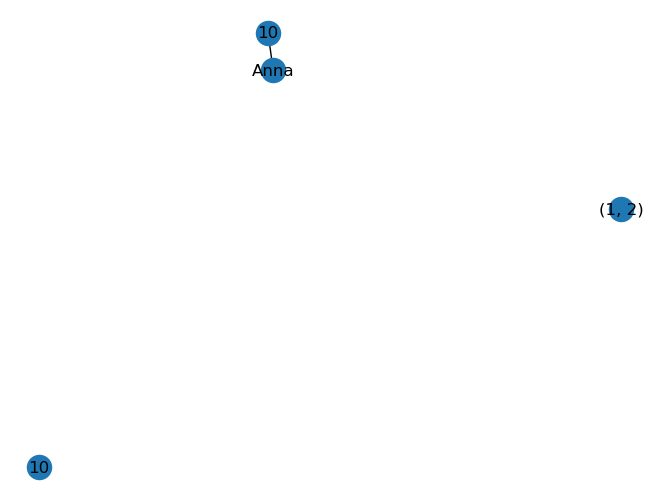

In [9]:
nx.draw(G, with_labels=True)

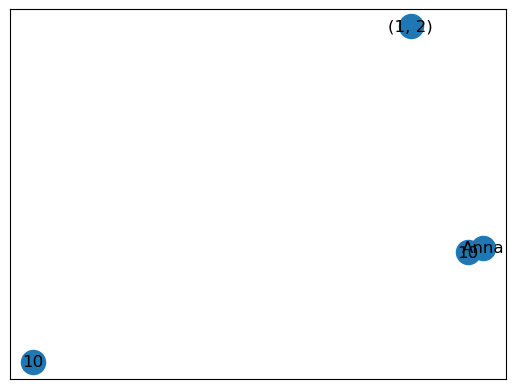

In [10]:
nx.draw_networkx(G)

In [11]:
G1 = nx.DiGraph()
G1.add_edge(10, "Anna", weight=100, tensors=None)

In [12]:
G1[10]

AtlasView({'Anna': {'weight': 100, 'tensors': None}})

In [13]:
G1["Anna"]

AtlasView({})

In [14]:
G2 = nx.MultiGraph()
G2.add_edge(10, "Anna", weight=100, tensors=None)
G2.add_edge(10, "Anna", weight=10, tensors=123)

1

In [15]:
G2.edges(data=True, keys=True)

MultiEdgeDataView([(10, 'Anna', 0, {'weight': 100, 'tensors': None}), (10, 'Anna', 1, {'weight': 10, 'tensors': 123})])

2\. Обсудите работу с популярными форматами для хранения графов.

In [16]:
G.edges(data=True)

EdgeDataView([(10, 'Anna', {'weight': 100, 'tensors': None})])

In [17]:
nx.adjacency_matrix(G, nodelist=[10, "Anna"][::-1]).toarray()

array([[  0, 100],
       [100,   0]])

## Задачи для самостоятельного решения

In [18]:
import networkx as nx
import random
import numpy as np

<p class="task" id="1"></p>

1\. Напишите функцию, генерирующую кольцевой неориентированный граф из `n` узлов (`n` - параметр функции). Идентификатором узла выступают целые числа от 0 до `n-1`. Каждому узлу добавьте атрибут `age`, заполненный случайными целыми числами от 1 до 100. Каждому ребру добавьте атрибут `mean_incident_age`, состоящий из среднего значения атрибута `age` у узлов, инцидентных данному ребру.

Создайте граф с `n=5` узлами. Выведите на экран __словари__, содержащие атрибут `age` для узлов (ключ - идентификатор узла) и `mean_incident_age` для ребер (ключ - пара `(u, v`) идентификаторов начала и конца ребра). Визуализируйте граф при помощи функции `nx.draw` (или `nx.draw_networkx`) с аргументами по умолчанию.

- [ ] Проверено на семинаре

In [ ]:
def gen_ring(n):
    G = nx.Graph()
    for i in range(n):
        G.add_node(i, age=random.randint(1, 100))
    G.add_edges_from([(i, i+1) for i in range(n-1)])
    G.add_edge(n-1, 0)
    for u, v in G.edges:
        G.edges[u, v]['mean_incident_age'] = (G.nodes[u]['age'] + G.nodes[v]['age']) / 2
    return G

In [20]:
G = gen_ring(5)
for node in G.nodes(data=True):
    print(node)

(0, {'age': 98})
(1, {'age': 84})
(2, {'age': 3})
(3, {'age': 92})
(4, {'age': 1})


In [21]:
for edge in G.edges(data=True):
    print(edge)

(0, 1, {'mean_incident_age': 91.0})
(0, 4, {'mean_incident_age': 49.5})
(1, 2, {'mean_incident_age': 43.5})
(2, 3, {'mean_incident_age': 47.5})
(3, 4, {'mean_incident_age': 46.5})


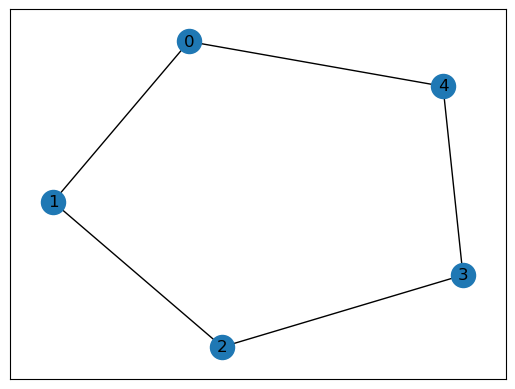

In [22]:
nx.draw_networkx(G)

<p class="task" id="2"></p>

2\. Напишите функцию, генерирующую ориентированный граф из `3n + 1` узлов (`n` - параметр функции), где центральный узел соединен с тремя путями длины `n`. Ребра всегда направлены в сторону удаления от центрального узла.

Сгенерируйте граф для `n=3`. Выведите на экран количество узлов и ребер в графе. Для каждого узла выведите на экран список идентификаторов его соседей (отдельно по входящим и исходящим связям). Визуализируйте граф при помощи функции `nx.draw`  (или `nx.draw_networkx`) с аргументами по умолчанию.

- [ ] Проверено на семинаре

In [23]:
def get_dir(n):
    G = nx.DiGraph()
    G.add_edges_from([(i, i+1) for j in range(3) for i in range(1+n*j, n*(j+1))])
    G.add_edges_from([(0, 1), (0, 1+n), (0, 1+2*n)])
    return G 

In [24]:
G = get_dir(3)
len(G), G.number_of_edges()

(10, 9)

In [25]:
for node in G.nodes:
    print(f'{node} входящие: {list(G.predecessors(node))}')
    print(f'{node} исходящие: {list(G.successors(node))}')

1 входящие: [0]
1 исходящие: [2]
2 входящие: [1]
2 исходящие: [3]
3 входящие: [2]
3 исходящие: []
4 входящие: [0]
4 исходящие: [5]
5 входящие: [4]
5 исходящие: [6]
6 входящие: [5]
6 исходящие: []
7 входящие: [0]
7 исходящие: [8]
8 входящие: [7]
8 исходящие: [9]
9 входящие: [8]
9 исходящие: []
0 входящие: []
0 исходящие: [1, 4, 7]


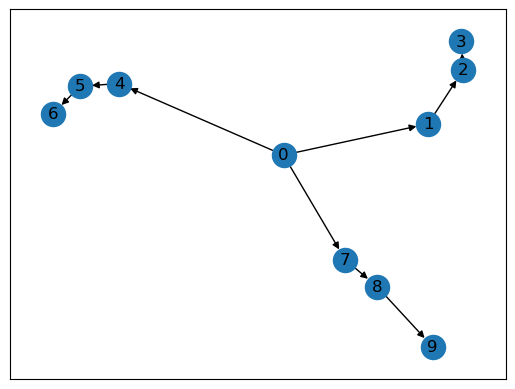

In [26]:
nx.draw_networkx(G)

<p class="task" id="3"></p>

3\. Напишите собственную функцию создания двумерной решетки `n` на `m`. В качестве идентификаторов узлов используйте пары `(x, y)`, где `x` - номер строки решетки, `y` - номер столбца решетки. Сохраните ширину и высоту решетки в виде атрибутов `n` и `m ` самого графа.

Сгенерируйте граф с n=5, m=4. Выведите на экран количество узлов и ребер в графе. Выведите созданные атрибуты графа на экран. Визуализируйте граф при помощи функции `nx.draw` с аргументами по умолчанию. Создайте и визуализируйте аналогичный по структуре граф при помощи готовой функции из `networkx`.

- [ ] Проверено на семинаре

In [27]:
def grid(n, m):
    G = nx.Graph(width=n, height=m)
    G.add_nodes_from([(j+1, i+1) for j in range(m) for i in range(n)])
    for x, y in G.nodes():
        if (x+1, y) in G.nodes:
            G.add_edge((x, y), (x+1, y))
        if (x, y+1) in G.nodes:
            G.add_edge((x, y), (x, y+1))
    return G

In [28]:
G = grid(5, 4)
G.graph

{'width': 5, 'height': 4}

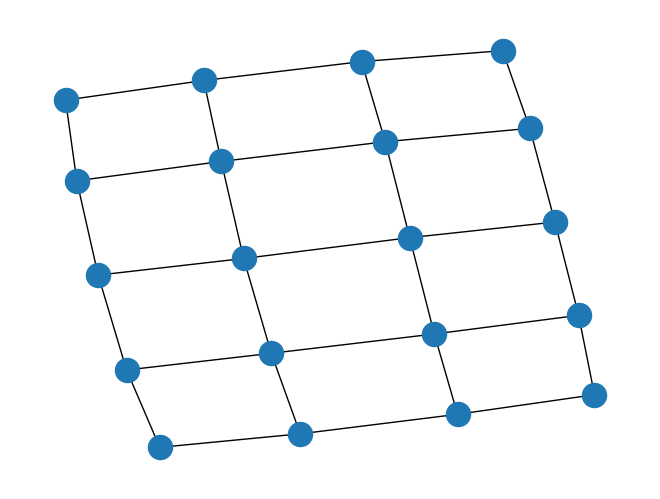

In [29]:
nx.draw(G)

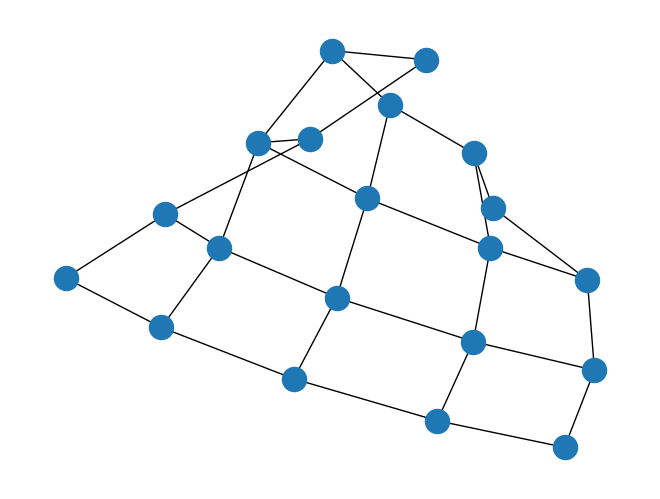

In [30]:
G = nx.grid_2d_graph(5, 4)
nx.draw(G)

<p class="task" id="4"></p>

4\. Напишите функцию, которая генерирует мультиграф, состоящий из `m` узлов, где количество связей между узлами `u` и `v` сэмплится из биномиального распределения с параметрами `n` и `p` (`m`, `n`, `p` - параметры функции). Петли в графе допускаются. На каждом ребре создайте атрибут `weight`, равный обратному значению количества ребер между индицентными ему узлами. Создайте и визуализируйте граф при помощи функции `nx.draw` с аргументами по умолчанию. Создайте версию графа с удаленными петлями и визуализуйте ее.

- [ ] Проверено на семинаре

In [79]:
def multi(m, n, p):
    G = nx.MultiGraph()
    G.add_nodes_from(range(m))
    for n1 in range(m):
        for n2 in range(n1, m):
            n_edges = np.random.binomial(n, p)
            G.add_edges_from((n1, n2, {'weight': 1 / n_edges}) for _ in range(n_edges))
    return G

In [80]:
G = multi(10, 5, 0.4)
for edge in G.edges(data=True):
    print(edge)

(0, 0, {'weight': 0.5})
(0, 0, {'weight': 0.5})
(0, 1, {'weight': 0.5})
(0, 1, {'weight': 0.5})
(0, 2, {'weight': 0.5})
(0, 2, {'weight': 0.5})
(0, 3, {'weight': 0.25})
(0, 3, {'weight': 0.25})
(0, 3, {'weight': 0.25})
(0, 3, {'weight': 0.25})
(0, 4, {'weight': 0.5})
(0, 4, {'weight': 0.5})
(0, 5, {'weight': 1.0})
(0, 6, {'weight': 0.3333333333333333})
(0, 6, {'weight': 0.3333333333333333})
(0, 6, {'weight': 0.3333333333333333})
(0, 7, {'weight': 0.5})
(0, 7, {'weight': 0.5})
(0, 8, {'weight': 0.5})
(0, 8, {'weight': 0.5})
(0, 9, {'weight': 0.5})
(0, 9, {'weight': 0.5})
(1, 1, {'weight': 0.5})
(1, 1, {'weight': 0.5})
(1, 2, {'weight': 1.0})
(1, 3, {'weight': 0.5})
(1, 3, {'weight': 0.5})
(1, 4, {'weight': 1.0})
(1, 5, {'weight': 0.3333333333333333})
(1, 5, {'weight': 0.3333333333333333})
(1, 5, {'weight': 0.3333333333333333})
(1, 6, {'weight': 0.3333333333333333})
(1, 6, {'weight': 0.3333333333333333})
(1, 6, {'weight': 0.3333333333333333})
(1, 7, {'weight': 1.0})
(1, 8, {'weight': 0.2

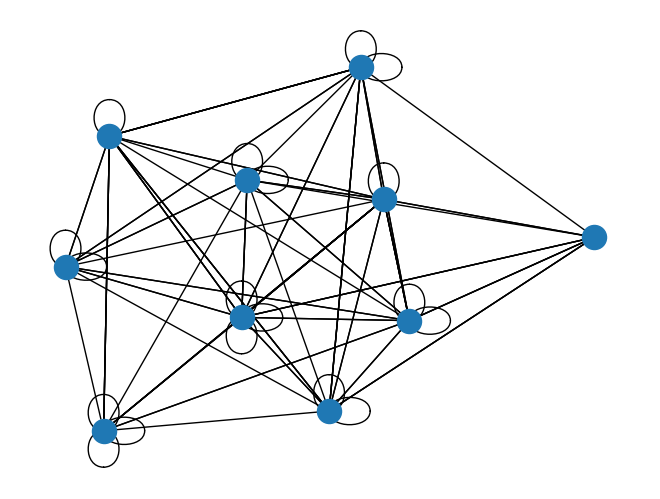

In [81]:
nx.draw(G)

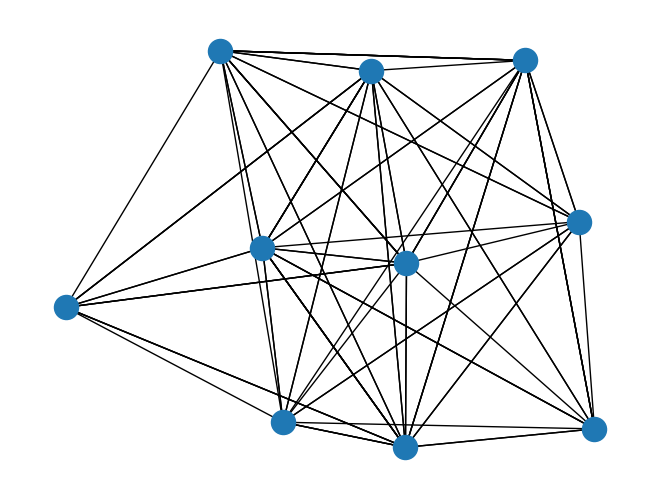

In [82]:
G_new = G.copy()
G_new.remove_edges_from(nx.selfloop_edges(G_new))
nx.draw(G_new)

<p class="task" id="5"></p>

5\. Граф «(u,v) цветок»: фрактальный граф, в котором на каждой итерации роста каждая связь заменяется на 2 пути, длиной u и v соответственно (см.рис). Реализуйте функцию построения (1, 2) цветка. Функция принимает один целочисленный параметр `n` - количество шагов построения. Создайте и визуализируйте граф при помощи функции `nx.draw` с аргументами по умолчанию. Выведите на экран количество узлов и ребер графа на каждой из итераций.

![](https://i.imgur.com/aJnbzxM.png)

- [ ] Проверено на семинаре

In [219]:
def flower(n):
    G = nx.MultiGraph()
    G.add_edge(0, 1)
    for i in range(n):
        print(f'Итерация {i+1}:')
        new_edges = []
        max_node = max(G.nodes) + 1
        for u, v, d in G.edges:
            new_edges.extend([(max_node+1, v), (max_node+1, u)])
            max_node += 1
        G.add_edges_from(new_edges)
        print(f'    Узлов: {len(G)}, рёбер: {G.number_of_edges()}')
    return G

In [220]:
G = flower(3)

Итерация 1:
    Узлов: 3, рёбер: 3
Итерация 2:
    Узлов: 6, рёбер: 9
Итерация 3:
    Узлов: 15, рёбер: 27


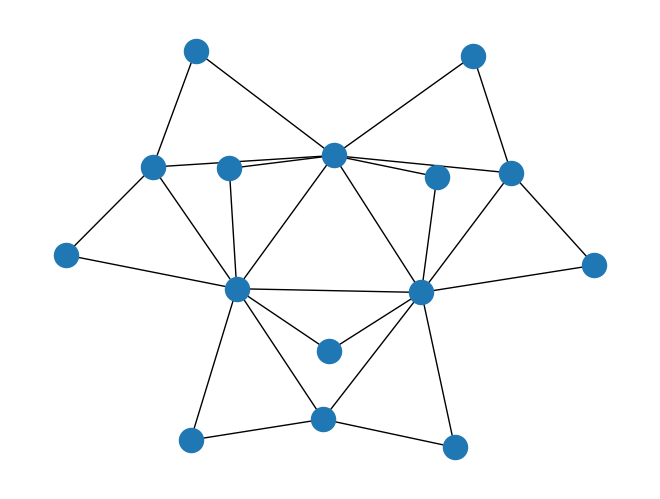

In [218]:
nx.draw(G)

<p class="task" id="6"></p>

6\. Загрузите матрицу смежности графа из файла `weighted_wheel.npy` и создайте на ее основе граф.  Выведите на экран количество узлов и связей графа. Выведите на экран тип графа (nx.Graph, nx.DiGraph, ...). Выведите на экран словарь со значениями атрибута `weight` на ребрах.Сохраните граф на диск в формате edgelist.

- [ ] Проверено на семинареc

In [254]:
adj_m = np.load('data/weighted_wheel.npy')
adj_m

array([[0, 1, 2, 2, 1, 1, 1, 2, 3, 1],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 2],
       [2, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [2, 0, 1, 0, 2, 0, 0, 0, 0, 0],
       [1, 0, 0, 2, 0, 3, 0, 0, 0, 0],
       [1, 0, 0, 0, 3, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 3, 0, 0],
       [2, 0, 0, 0, 0, 0, 3, 0, 2, 0],
       [3, 0, 0, 0, 0, 0, 0, 2, 0, 3],
       [1, 2, 0, 0, 0, 0, 0, 0, 3, 0]], dtype=int32)

In [255]:
np.array_equal(adj_m, adj_m.T)

True

In [256]:
G = nx.Graph(adj_m)
type(G)

networkx.classes.graph.Graph

In [259]:
nx.get_edge_attributes(G, 'weight')

{(0, 1): 1,
 (0, 2): 2,
 (0, 3): 2,
 (0, 4): 1,
 (0, 5): 1,
 (0, 6): 1,
 (0, 7): 2,
 (0, 8): 3,
 (0, 9): 1,
 (1, 2): 1,
 (1, 9): 2,
 (2, 3): 1,
 (3, 4): 2,
 (4, 5): 3,
 (6, 7): 3,
 (7, 8): 2,
 (8, 9): 3}

In [262]:
nx.write_edgelist(G, 'results/graph.edgelist')

<p class="task" id="7"></p>

7\. Загрузите информацию о ребрах графа из файла `data/karate.edgelist` и создайте на ее основе граф при помощи функции `read_edgelist`. При создании графа приведите идентификаторы узлов к числовому типу. Выведите на экран количество узлов и ребер загруженного графа, выведите на экран список узлов графа. Загрузите граф карате-клуба при помощи функции `nx.karate_club_graph`. Сравните две матрицы смежности (загруженного из файла графа и графа, созданного функцией) и покажите, что они одинаковые. При создании матриц смежности учтите, что порядок следования узлов в графах может различаться.  

- [ ] Проверено на семинаре

In [298]:
G1 = nx.read_edgelist('data/karate.edgelist', nodetype=int, delimiter='/')
len(G1), G1.number_of_edges()

(34, 78)

In [299]:
G1.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31, 30, 9, 27, 28, 32, 16, 33, 14, 15, 18, 20, 22, 23, 25, 29, 24, 26))

In [309]:
G2 = nx.karate_club_graph()
adj_1 = nx.to_numpy_array(G1, nodelist=sorted(G1.nodes(), key=lambda x: (G1.degree(x), sorted(G1.neighbors(x)))))
adj_2 = nx.to_numpy_array(G2, nodelist=sorted(G2.nodes(), key=lambda x: (G2.degree(x), sorted(G2.neighbors(x)))))
adj_1

array([[0., 0., 0., ..., 0., 3., 0.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 0., ..., 0., 2., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 5.],
       [3., 2., 2., ..., 0., 0., 0.],
       [0., 0., 0., ..., 5., 0., 0.]])

In [310]:
np.array_equal(adj_1, adj_2)

True